# Mô tả dữ liệu
- Dataset: Dresses_Attribute_Sales
- Link: https://archive.ics.uci.edu/ml/datasets/Dresses_Attribute_Sales
- Associated Tasks: Classification, Clustering
- Number of Instances: 1000
- Number of Attributes: 7

In [1]:
# import all necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# reading dataset to dataframe
df = pd.read_csv("Dresses_Attribute_Sales.csv")
df.head(10)

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,null,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,null,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,null,null,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0
5,1068332458,bohemian,Low,0.0,M,Summer,v-neck,sleevless,empire,null,null,null,print,0
6,1220707172,Casual,Average,0.0,XL,Summer,o-neck,full,null,cotton,null,null,solid,0
7,1219677488,Novelty,Average,0.0,free,Automn,o-neck,short,natural,polyster,broadcloth,lace,null,0
8,1113094204,Flare,Average,0.0,free,Spring,v-neck,short,empire,cotton,broadcloth,beading,solid,1
9,985292672,bohemian,Low,0.0,free,Summer,v-neck,sleevless,natural,nylon,chiffon,null,null,1


# Các loại dữ liệu
- Nomial
- Numbers
- Odinal
- Ratio

In [3]:
# Nomial
df_nomial = df[["Style", "NeckLine", "Material", "Pattern Type"]]
df_nomial.head(5)

,Style,NeckLine,Material,Pattern Type
0,Sexy,o-neck,null,animal
1,Casual,o-neck,microfiber,animal
2,vintage,o-neck,polyster,print
3,Brief,o-neck,silk,print
4,cute,o-neck,chiffonfabric,dot


In [4]:
# Numbers
df_numbers = df[["Dress_ID"]]
df_numbers.head(5)

,Dress_ID
0,1006032852
1,1212192089
2,1190380701
3,966005983
4,876339541


In [5]:
# Ordinal
df_ordinal = df[["Size"]]
df_ordinal.head(5)

,Size
0,M
1,L
2,L
3,L
4,M


In [6]:
# ratio
df_ratio = df[["Rating"]]
df_ratio.head(5)

,Rating
0,4.6
1,0.0
2,0.0
3,4.6
4,4.5


# Trung tâm dữ liệu
- Trung bình (mean)
$$\mu = \bar{x} = \frac{1}{n} \sum_{i=1}^n x_i = \frac{1}{n} (x_1 + ... + x_n)$$
- Trung vị (median)
- Mode

In [7]:
df_nomial.describe()

,Style,NeckLine,Material,Pattern Type
count,500,497,499,499
unique,13,16,24,15
top,Casual,o-neck,cotton,solid
freq,232,271,152,203


In [8]:
df_numbers.describe()

,Dress_ID
count,5.000000e+02
mean,9.055417e+08
std,1.736190e+08
min,4.442820e+08
25%,7.673164e+08
50%,9.083296e+08
75%,1.039534e+09
max,1.253973e+09


In [9]:
df_ordinal.describe()

,Size
count,500
unique,7
top,M
freq,177


In [10]:
df_ratio.describe()

,Rating
count,500.000000
mean,3.528600
std,2.005364
min,0.000000
25%,3.700000
50%,4.600000
75%,4.800000
max,5.000000


In [11]:
mean_rating = df_ratio["Rating"].mean()
median_rating = df_ratio["Rating"].median()
mode_rating = df_ratio["Rating"].mode().get(0)
print "Mean rating:", mean_rating
print "Median rating:", median_rating
print "Mode rating:", mode_rating

Mean rating: 3.5286
Median rating: 4.6
Mode rating: 0.0


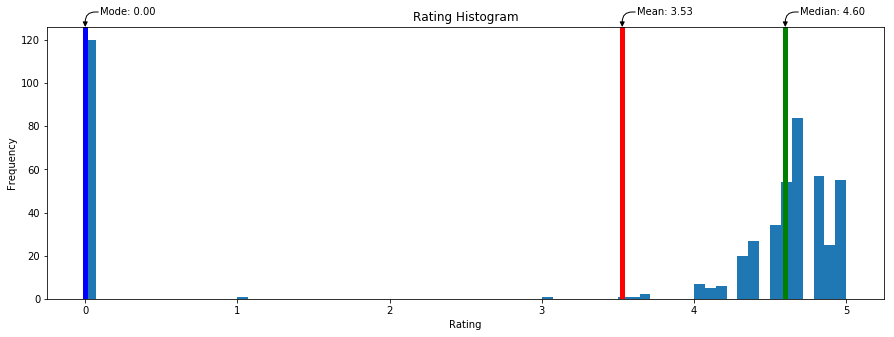

In [22]:
# visualize price column
fig, ax = plt.subplots(figsize=(15, 5))
ax.axvline(mean_rating, color='red', linewidth=5)
ax.axvline(median_rating, color='green', linewidth=5)
ax.axvline(mode_rating, color='blue', linewidth=5)

# Add arrows annotating the means:
def add_arrow(label, val, align="left"):
    ax.annotate(label + ': {:0.2f}'.format(val), xy=(val, 1), xytext=(15, 15),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )

add_arrow("Mean", mean_rating)
add_arrow("Median", median_rating)
add_arrow("Mode", mode_rating)
ax.legend(loc='upper left')
ax.margins(0.05)

plt.hist(df_ratio["Rating"], bins=70)
plt.title("Rating Histogram")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Biến đổi của dữ liệu 
- Khoảng đoạn (range)
$$range = maxValue - minValue$$

- Phương sai (variance)
$$\sigma^2 = \frac{\sum_{i=1}^n (x_i - \mu)}{n}$$

- Độ lệch chuẩn (standard deviation)
$$\sigma = \sqrt{\frac{\sum_{i=1}^n (x_i - \mu)}{n}}$$

- Z-score: biến đổi từ sample mean để thực hiện Z-test
$$Z = \frac{X - \mu}{\sigma}$$

- Phân vị (percentile)
$$percentile \ of \ x = \frac{No. value \ below \ x}{n} * 100\\$$
$$quartiles = \frac{percentile * n}{100}$$

In [13]:
# range of rating
min_rating = df_ratio["Rating"].min()
max_rating = df_ratio["Rating"].max()
range_rating = max_rating - min_rating
print "Min rating:", min_rating
print "Max rating:", max_rating
print "Rating range:", range_rating

Min rating: 0.0
Max rating: 5.0
Rating range: 5.0


In [14]:
# variance of rating
var_rating = df_ratio["Rating"].var()
print "Rating variance:", var_rating

Rating variance: 4.02148501002


In [15]:
# standard deviation of rating
std_rating = df_ratio["Rating"].std()
print "Rating standard deviation:", std_rating

Rating standard deviation: 2.00536405922


In [16]:
# z-score of rating
z_score_rating = df_ratio["Rating"] - mean_rating / std_rating
print "Rating:"
print df_ratio["Rating"].head(5)

print "\nZ-score of rating:"
z_score_rating.head(5)

Rating:
0    4.6
1    0.0
2    0.0
3    4.6
4    4.5
Name: Rating, dtype: float64

Z-score of rating:


0    2.840419
1   -1.759581
2   -1.759581
3    2.840419
4    2.740419
Name: Rating, dtype: float64

In [17]:
num_items = df_ratio["Rating"].count()
percentile_rating = pd.Series(list(df_ratio["Rating"].sort_values()), index = range(0, num_items))
_25_percent = percentile_rating.get(0.25 * num_items)
_50_percent = percentile_rating.get(0.5 * num_items)
_75_percent = percentile_rating.get(0.75 * num_items)

print "25%:", _25_percent
print "50%:", _50_percent
print "75%:", _75_percent

25%: 3.7
50%: 4.6
75%: 4.8


# Xác suất
- Xác suất (probability)
$$probability = \frac{event(s)}{outcome(s)}$$

- Phép đếm hoán vị (permutation)
$$P(n, r) = \frac{n!}{(n - r)!}\\$$
$$n: distinct\ object\ to\ choose\ from$$
$$r: spaces\ to\ fill.$$

- Phép đếm tổ hợp (combination)
$$C(n, r) = \frac{n!}{r!(n - r)!}$$

- Xác suất có điều kiện (conditional probability)
$$P(B|A) = \frac{P(A \cap B)}{P(A)}$$

- Biến độc lập và biến phụ thuộc (independent/dependent variable)
    - Independent variable: 
        * Dress_ID
        * Style
        * Price
        * Rating
        * Size
        * Season
        * NeckLine
        * SleeveLength
        * waiseline
        * Material
        * FabricType
        * Decoration
        * Pattern Type
    - Dependent variable: Recommendation

- Bayes
$$P(A|B) = \frac{P(B|A) P(A)}{P(B)}\\$$
$$Posterior = \frac{Likelihood * Prior}{Evidence}$$

In [18]:
# probability to get rating 4.0
counter=Counter(df_ratio["Rating"])
prob_of_4 = counter[4.0] * 100.0 / len(counter)
print "Probability to get rating 4.0:", prob_of_4, "%"

Probability to get rating 4.0: 41.1764705882 %


In [19]:
# Conditional probability
# P(Style:sexy|Season:summer) = P(Style:sexy and Season:summer) / P(Season:summer)
df_summer = df[df["Season"] == "Summer"]["Season"]
p_summer = df_summer.count() * 100.0 / num_items

df_sexy_summer = df[(df["Style"] == "Sexy") & (df["Season"] == "Summer")]["Style"]
p_sexy_summer = df_sexy_summer.count() * 100.0 / num_items

p_sexy_given_summer = p_sexy_summer * 100 / p_summer

print "P(Season:summer)", p_summer
print "P(Style:sexy and Season:summer)", p_sexy_summer
print "P(Style:sexy and Season:summer)", p_sexy_given_summer

P(Season:summer) 31.8
P(Style:sexy and Season:summer) 4.8
P(Style:sexy and Season:summer) 15.0943396226


In [20]:
# Bayes
# P(Style:sexy|Season:summer) = P(Season:summer|Style:sexy) * P(Style:sexy) / P(Season:summer)
df_style = df[df["Style"] == "Sexy"]["Style"]
p_sexy = df_style.count() * 100.0 / num_items

p_summer_given_sexy = p_sexy_summer * 100 / p_sexy

p_sexy_given_summer_bayes = p_summer_given_sexy * p_sexy / p_summer

print "P(Style:sexy)", p_sexy
print "P(Season:summer)", p_summer
print "P(Season:summer|Style:sexy)", p_summer_given_sexy
print "P(Style:sexy|Season:summer) Bayes:", p_sexy_given_summer_bayes

P(Style:sexy) 13.8
P(Season:summer) 31.8
P(Season:summer|Style:sexy) 34.7826086957
P(Style:sexy|Season:summer) Bayes: 15.0943396226


# Continuous probability distribution

- Định lý giới hạn trung tâm (central limit theorem)
- Phép biến đổi Z

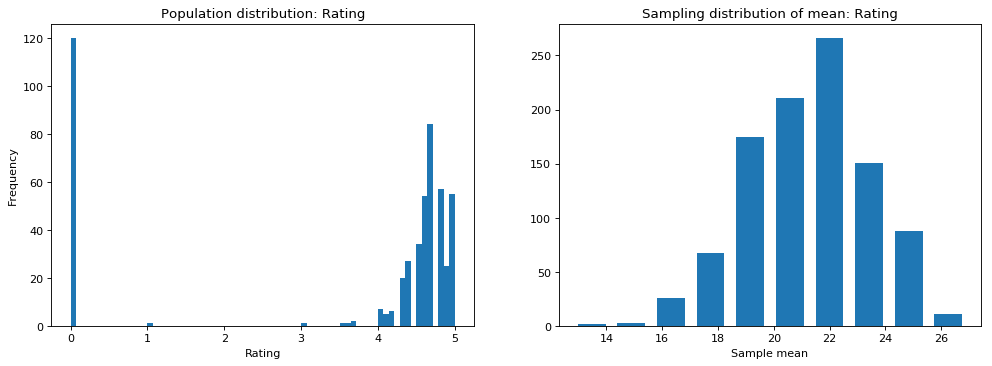

In [21]:
# Simulating Central limit theorem
num_sample = 30
num_loop = 1000
samp_mean_ls = []

for i in range(0, num_loop):
    sum_of_sample = 0
    samp_idx = np.random.choice(num_items, num_sample, replace=False)
    for idx in samp_idx:
        sum_of_sample = sum_of_sample + df["Rating"].get(idx)
    x_bar = sum_of_sample * 100 / num_items
    samp_mean_ls.append(x_bar)
    
# ploting population
fig = plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.hist(df_ratio["Rating"], bins=70)
plt.title("Population distribution: Rating")
plt.xlabel("Rating")
plt.ylabel("Frequency")

# ploting sampling
plt.subplot(1, 2, 2)
hist, bins = np.histogram(samp_mean_ls)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("Sampling distribution of mean: Rating")
plt.xlabel("Sample mean")
plt.show()